# Finding the Best Markets to Advertise In

In this project, we'll find out the two best markets for an e-learning company to advertise their products in. Most of the courses offered by the company are web and mobile development, but they also offer other courses such as data science and game development.

# Understanding the Data

We'll use the data from [freeCodeCamp's 2017 New Coder Survey](https://github.com/freeCodeCamp/2017-new-coder-survey) in this project.

In [1]:
# Import modules
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Read in the data file
fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)

# Number of rows and columns
print('The number of rows in the data set is:', fcc.shape[0])
print('The number of columns in the data set is:', fcc.shape[1])

# Explore the data set
pd.options.display.max_columns = None # Display all columns
fcc.head(5)

The number of rows in the data set is: 18175
The number of columns in the data set is: 136


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

# Checking for Sample Representativity

We want to know if the sample data represents the population of new coders interested in web and mobile development.

In [2]:
# Explore the JobRoleInterest
fcc['JobRoleInterest'].value_counts(normalize = True)*100

Full-Stack Web Developer                                                                                                                                   11.770595
  Front-End Web Developer                                                                                                                                   6.435927
  Data Scientist                                                                                                                                            2.173913
Back-End Web Developer                                                                                                                                      2.030892
  Mobile Developer                                                                                                                                          1.673341
Game Developer                                                                                                                                              1.630435
Informatio

A quick look over the table, we can see that:
- The majority of people is interested in more than one subject
- Many of them are interested in web development, including front-end, back-end, and full-stack web development.
- Some of them are interested in mobile development.

In [3]:
role_interest = fcc['JobRoleInterest']
role_interest.head()

0                                                  NaN
1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
Name: JobRoleInterest, dtype: object

In [4]:
# convert to lowercase
lowercase_role_interest = role_interest.str.lower()
lowercase_role_interest.head()

0                                                  NaN
1                             full-stack web developer
2      front-end web developer, back-end web develo...
3      front-end web developer, full-stack web deve...
4    full-stack web developer, information security...
Name: JobRoleInterest, dtype: object

In [5]:
# remove white spaces
strip_role_interest = lowercase_role_interest.str.strip()
strip_role_interest.head()

0                                                  NaN
1                             full-stack web developer
2    front-end web developer, back-end web develope...
3    front-end web developer, full-stack web develo...
4    full-stack web developer, information security...
Name: JobRoleInterest, dtype: object

In [6]:
# remove null data
cleaned_role_interest = strip_role_interest[strip_role_interest.notna()]
cleaned_role_interest.head()

1                             full-stack web developer
2    front-end web developer, back-end web develope...
3    front-end web developer, full-stack web develo...
4    full-stack web developer, information security...
6                             full-stack web developer
Name: JobRoleInterest, dtype: object

In [7]:
# split role in each row
split_role_interest = cleaned_role_interest.str.split(',')
split_role_interest.head()

1                           [full-stack web developer]
2    [front-end web developer,  back-end web develo...
3    [front-end web developer,  full-stack web deve...
4    [full-stack web developer,  information securi...
6                           [full-stack web developer]
Name: JobRoleInterest, dtype: object

In [8]:
# percentage of people interested in one subject and multiple subjects
split_role_interest.apply(lambda x: len(x)).value_counts(normalize = True)*100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

In [9]:
# percentage of people interested in web and mobile development 
bool_series = cleaned_role_interest.str.contains('web developer|mobile developer')
bool_series.value_counts(normalize = True) * 100

True     86.270023
False    13.729977
Name: JobRoleInterest, dtype: float64

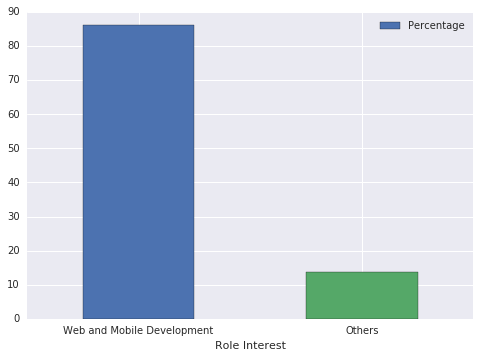

In [10]:
# visualize percentage of people interested in web and mobile development
percentage_web_mobile = (bool_series.value_counts(normalize = True)*100)[1]
role_interest = ['Web and Mobile Development', 'Others']
percent = [percentage_web_mobile, 100 - percentage_web_mobile]

df = pd.DataFrame({'Role Interest':role_interest, 'Percentage':percent}) 
df.plot.bar(x = 'Role Interest', y = 'Percentage', rot = 0)

As we said at the beginning, the company mainly offers courses in web and mobile development, but also provides courses in other domains. Also, from the above graph, almost 90% of respondents are interested in web and mobile development. Therefore, this data survey represents the population of new coders interested in programming.

# New Coders - Locations and Densities

We want to know:
- Where are the coders located?
- what are the locations with the most significant number of new coders?

First of all, we will need to drop all the rows where participants didn't answer which roles they are interested in.

In [11]:
# drop the rows contains null values
cleaned_fcc = fcc.dropna(subset = ['JobRoleInterest'])

In [12]:
absolute_freq = cleaned_fcc['CountryLive'].value_counts()
relative_freq = cleaned_fcc['CountryLive'].value_counts(normalize = True)
freq_table = pd.DataFrame({'Absolute Frequencies': absolute_freq, 'Relative Frequencies': relative_freq})
freq_table

,Absolute Frequencies,Relative Frequencies
United States of America,3125,0.457005
India,528,0.077216
United Kingdom,315,0.046066
Canada,260,0.038023
Poland,131,0.019158
Brazil,129,0.018865
Germany,125,0.018280
Australia,112,0.016379
Russia,102,0.014917
Ukraine,89,0.013016


We can see that:
- Almost half of the participants (45.7%) are living in the US.
- India is the second potential country on the list, with 7.7% of all participants interested in programming.
- The number of respondents living in India is not much more than that of the UK or Canada (4.6% and 3.8%, respectively).

It is obvious that the US is the potential market to advertise in. Although the number of participants in India is more than that of UK or Canada, we cannot say that India is more potential than the UK or Canada because freeCodeCamp is a free platform while the company we're working for is selling courses.

Therefore, we will need to include India, the UK, and Canada in our analysis to see if coders in these countries are willing to pay money for courses.

# Spending Money for Learning

Our company sells subscriptions at $59 per month, so we want to know how much new coders are willing to spend on learning.

In [13]:
# replace 0 in MonthsProgramming with 1
cleaned_fcc['MonthsProgramming'].value_counts().sort_index().head(5)

0.0    235
1.0    767
2.0    669
3.0    637
4.0    367
Name: MonthsProgramming, dtype: int64

In [14]:
cleaned_fcc['MonthsProgramming'].replace(0,1, inplace = True)

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [15]:
# create a column describing how much money respondents has spent per month
cleaned_fcc['MoneySpentPerMonth'] = cleaned_fcc['MoneyForLearning'] / cleaned_fcc['MonthsProgramming']

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [16]:
# Explore MoneySpentPerMonth column
cleaned_fcc['MoneySpentPerMonth'].isnull().sum()

675

In [17]:
# in MoneySpentPerMonth, keep only rows that don't have null values
cleaned_fcc.dropna(subset = ['MoneySpentPerMonth'], inplace = True)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [18]:
# create a data frame for 4 countries
table = cleaned_fcc.loc[:, ['CountryLive','MoneySpentPerMonth']]
summarized_table = table.groupby(by = ['CountryLive']).mean()

In [19]:
summarized_table = summarized_table[(summarized_table.index == 'India')|(summarized_table.index == 'Canada')|(summarized_table.index == 'United Kingdom')|(summarized_table.index == 'United States of America')]
summarized_table.sort_values('MoneySpentPerMonth', ascending = False)

,MoneySpentPerMonth
CountryLive,
United States of America,227.997996
India,135.100982
Canada,113.510961
United Kingdom,45.534443


Surprisingly, people in India have spent more than people in Canada or the UK. We will need to explore more about the data. There might be outliers in the data.

# Dealing with Extreme Outliers

Let generate box plots to visualize the distribution of the data.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



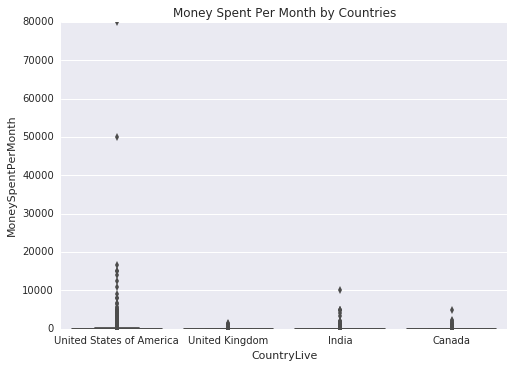

In [20]:
table_4 = table[(table['CountryLive'] == 'India')|(table['CountryLive'] == 'Canada')|(table['CountryLive'] == 'United Kingdom')|(table['CountryLive'] == 'United States of America')]
sns.boxplot(x = 'CountryLive', y = 'MoneySpentPerMonth', data = table_4)
plt.title('Money Spent Per Month by Countries')

We can immediately see that a person in the US spent \$50,000 per month on learning, and another person in the US spent \$80,000 per month on education. It is not impossible, but it seems unlikely. Therefore, we will remove data over 20,000.

In [21]:
# filter data over 20000
table_4_good = table_4[table_4['MoneySpentPerMonth'] < 20000]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



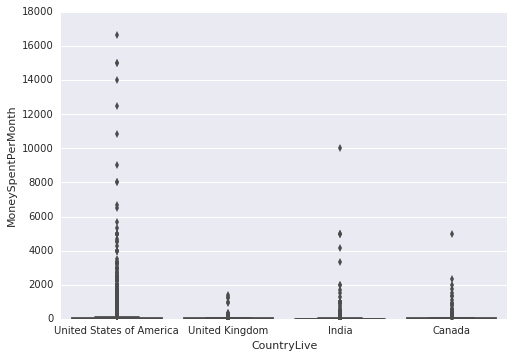

In [22]:
# visualize the data after filter 2 extreme outliers
sns.boxplot(x = 'CountryLive', y = 'MoneySpentPerMonth', data = table_4_good)

In [23]:
# explore outliers in the US
USA = cleaned_fcc[cleaned_fcc['CountryLive'] == 'United States of America']
USA_outliers = USA[USA['MoneySpentPerMonth'] >= 6000]
USA_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In these 13 outliers, 7 of them attended bootcamps, while 6 of them did not. Therefore, we will remove those who did not participate in any bootcamps or those who learn programming for less than three months because there is a chance that they just spent an enormous amount of money on bootcampts. Hence, they are not willing to spend money in the next several months.

We will drop rows where:
- the person does not attend any bootcamp and says spend more than \$6000 on learning
- the person participated in a bootcamp but has less than three months of learning programming

In [24]:
# drop no bootcamp and more than 6000 row in USA
usa_outliers_index = USA_outliers[USA_outliers['AttendedBootcamp'] == 0].index
cleaned_fcc.drop(index = usa_outliers_index, inplace = True)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [25]:
# drop rows where the person attended bootcamp and has less than 3 months of learning programming
usa_outliers_index2 = USA_outliers[(USA_outliers['AttendedBootcamp'] == 1)&(USA_outliers['MonthsProgramming'] <= 3)].index
cleaned_fcc.drop(index = usa_outliers_index2, inplace = True)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [26]:
# Explore outliers in India
india = cleaned_fcc[cleaned_fcc['CountryLive'] == 'India']
india_outliers = india[india['MoneySpentPerMonth'] >= 2500]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0

Neither participant attended a bootcamp. In the survey, participants were asked, "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)," they might have misunderstood the question and include college tuition or include the amount of money in their currency. Therefore, to be safe, we will remove all these rows.

In [27]:
# remove india outliers
cleaned_fcc.drop(index = india_outliers.index, inplace = True)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [28]:
# explore outliers in Canada
canada = cleaned_fcc[cleaned_fcc['CountryLive'] == 'Canada']
canada_outliers = canada[canada['MoneySpentPerMonth'] >= 3500]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


The person above attended a bootcamp and has been learning to program for two months. Likely, he will not spend money in the next several months. Therefore, we will remove this row.

In [29]:
# remove canada outliers
cleaned_fcc.drop(index = canada_outliers.index, inplace = True)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [30]:
# recreate table for 4 countries
top_4 = cleaned_fcc[(cleaned_fcc['CountryLive'] == 'United States of America')|(cleaned_fcc['CountryLive'] == 'India')|(cleaned_fcc['CountryLive'] == 'United Kingdom')|(cleaned_fcc['CountryLive'] == 'Canada')]

In [31]:
money_per_month = top_4.loc[:,['CountryLive','MoneySpentPerMonth']].groupby('CountryLive').mean().sort_values(by = 'MoneySpentPerMonth', ascending = False)
money_per_month

,MoneySpentPerMonth
CountryLive,
United States of America,142.654608
Canada,93.065400
India,65.758763
United Kingdom,45.534443


In [32]:
# Compute the number of students at these 4 countries
top_4['CountryLive'].value_counts()

United States of America    2920
India                        457
United Kingdom               279
Canada                       239
Name: CountryLive, dtype: int64

# Choosing the Best Markets

In [36]:
# create a table with number of participants and how much each of them are willing to spend
final_table = pd.DataFrame({'Country': ['United States of America','Canada','India','United Kingdom'], 'Number of participants':[2920,239,457,279], 'Money per month':[142.65,93.07,65.76,45.53]})
final_table['Total value'] = final_table['Money per month'] * final_table['Number of participants']
final_table

,Country,Money per month,Number of participants,Total value
0,United States of America,142.65,2920,416538.00
1,Canada,93.07,239,22243.73
2,India,65.76,457,30052.32
3,United Kingdom,45.53,279,12702.87


In the above table, it is obvious that the US is our first choice. However, for the second choice, although people in Canada can spend more money than those in India, the number of participants are interested in learning programming in India is much more than that of Canada. We will choose either Canada or India or both of them.

In [40]:
# figure out how to divide our budget
final_table = final_table.head(3)
final_table['Percentage budget'] = final_table['Total value']*100/final_table['Total value'].sum()
final_table

,Country,Money per month,Number of participants,Total value,Percentage budget
0,United States of America,142.65,2920,416538.00,88.845509
1,Canada,93.07,239,22243.73,4.744478
2,India,65.76,457,30052.32,6.410012


At this point, we have several options:
- If we want to advertise in all three countries, we can spend:
 - 90% of our budget in the US, 5% in Canada, and 5% in India
 - 60% of our budget in the US, 25% in India, and 15% in Canada
- If we want to advertise in two countries, we can spend:
 - 70% of our budget in the US, and 30% in either Canada or India
- If we want to advertise in only one country, we can spend our budget on advertising in the US.